In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Set 3

## load and explore the data set

In [2]:
# load the data
data_train = pd.read_csv('../data/datatraining.csv', index_col = 0)
data_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,04/02/2015 17:51,23.18,27.2720,426.0,721.25,0.004793,1
2,04/02/2015 17:51,23.15,27.2675,429.5,714.00,0.004783,1
3,04/02/2015 17:53,23.15,27.2450,426.0,713.50,0.004779,1
4,04/02/2015 17:54,23.15,27.2000,426.0,708.25,0.004772,1
5,04/02/2015 17:55,23.10,27.2000,426.0,704.50,0.004757,1


In [3]:
# check df shape
data_train.shape

(8143, 7)

In [4]:
# check indexes
data_train.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            8134, 8135, 8136, 8137, 8138, 8139, 8140, 8141, 8142, 8143],
           dtype='int64', length=8143)

In [5]:
# check the data types
data_train.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [6]:
# convert date column to date data type
data_train['date'] = pd.to_datetime(data_train['date'])
data_train.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

In [7]:
# general overview
data_train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [8]:
# check the total records of occupancy
data_train['Occupancy'].value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

In [9]:
# check for duplicates
data_train.duplicated().sum()

25

In [10]:
# check the duplicated rows
data_train[data_train.duplicated()]

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
162,2015-04-02 20:31:00,21.70,26.79,0.0,525.5,0.004300,0
310,2015-04-02 22:59:00,21.20,25.60,0.0,471.0,0.003983,0
317,2015-04-02 23:06:00,21.20,25.60,0.0,474.0,0.003983,0
555,2015-05-02 03:04:00,21.00,24.89,0.0,439.0,0.003824,0
726,2015-05-02 05:55:00,20.89,23.39,0.0,450.5,0.003568,0
735,2015-05-02 06:04:00,20.89,23.29,0.0,443.0,0.003553,0
2269,2015-06-02 07:38:00,20.20,18.60,0.0,435.0,0.002715,0
3248,2015-06-02 23:57:00,20.00,18.70,0.0,441.0,0.002696,0
3267,2015-07-02 00:16:00,20.00,18.79,0.0,435.0,0.002709,0
3486,2015-07-02 03:55:00,19.79,19.29,0.0,441.0,0.002746,0


In [11]:
'''
the records are from the same day but different time
'''

'\nthe records are from the same day but different time\n'

In [12]:
# check the date column range
print(data_train['date'].min())
print(data_train['date'].max())

2015-04-02 17:51:00
2015-10-02 09:33:00


In [13]:
# set date to index
data_train_dateidx = data_train.set_index('date')
data_train_dateidx.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-04-02 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-04-02 17:51:00,23.15,27.2675,429.5,714.00,0.004783,1
2015-04-02 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-04-02 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-04-02 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [14]:
# check the index
data_train_dateidx.index

DatetimeIndex(['2015-04-02 17:51:00', '2015-04-02 17:51:00',
               '2015-04-02 17:53:00', '2015-04-02 17:54:00',
               '2015-04-02 17:55:00', '2015-04-02 17:55:00',
               '2015-04-02 17:57:00', '2015-04-02 17:57:00',
               '2015-04-02 17:58:00', '2015-04-02 18:00:00',
               ...
               '2015-10-02 09:23:00', '2015-10-02 09:24:00',
               '2015-10-02 09:26:00', '2015-10-02 09:27:00',
               '2015-10-02 09:28:00', '2015-10-02 09:29:00',
               '2015-10-02 09:29:00', '2015-10-02 09:30:00',
               '2015-10-02 09:32:00', '2015-10-02 09:33:00'],
              dtype='datetime64[ns]', name='date', length=8143, freq=None)

In [15]:
# checking for missing values
data_train_dateidx.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

## Evaluate the correlatation

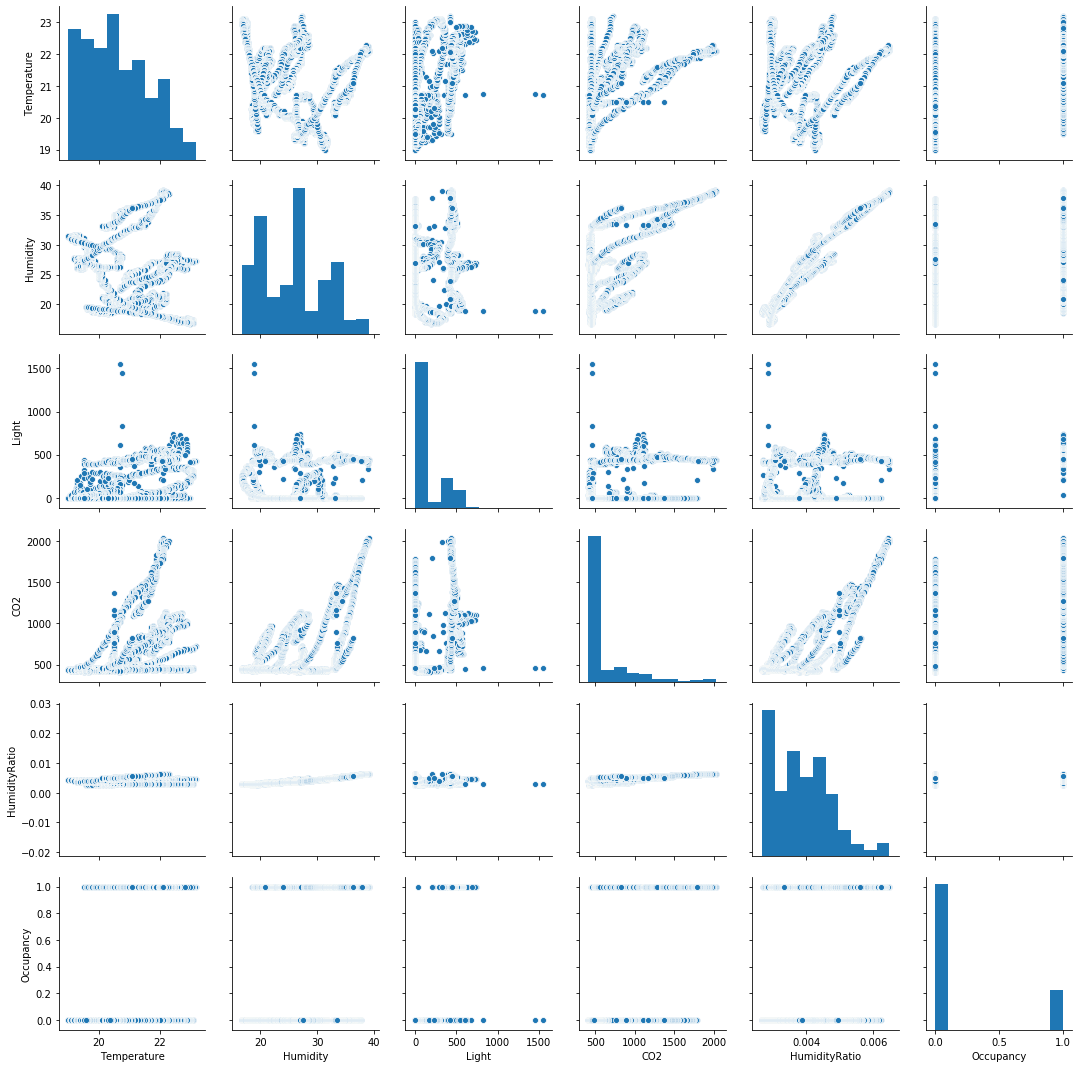

In [16]:
# create pairplot
import seaborn as sns
sns.pairplot(data_train_dateidx)
plt.show()

In [17]:
# create correlation matrix
data_train_dateidx_corr = data_train_dateidx.corr()
corr_mask = abs(data_train_dateidx.corr()) > 0.5
data_train_dateidx_corr[corr_mask]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,NaN,0.649942,0.559894,NaN,0.538220
Humidity,NaN,1.000000,NaN,NaN,0.955198,NaN
Light,0.649942,NaN,1.000000,0.664022,NaN,0.907352
CO2,0.559894,NaN,0.664022,1.000000,0.626556,0.712235
HumidityRatio,NaN,0.955198,NaN,0.626556,1.000000,NaN
Occupancy,0.538220,NaN,0.907352,0.712235,NaN,1.000000


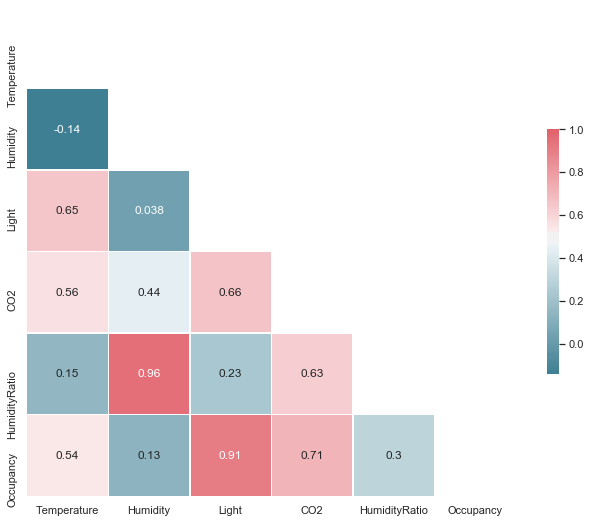

In [18]:
# create heatmap
sns.set(style="white")

# generate a mask for the upper triangle
mask = np.zeros_like(data_train_dateidx_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap = True)

# draw the heatmap with the mask and correct aspect ration
sns.heatmap(data_train_dateidx_corr, mask = mask, cmap = cmap, center = 0.5,
           annot = True, square = True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()

In [19]:
'''
light is the one more correlated with occupancy
'''

'\nlight is the one more correlated with occupancy\n'

In [20]:
data_train_dateidx.to_csv('../data/dataset3.csv')